In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('population_total.csv')

In [3]:
df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2100
dtypes: object(302)
memory usage: 464.9+ KB


# Data Cleaning

In [5]:
df[df.duplicated()]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100


No Duplicates

In [6]:
df = df.melt(id_vars=['country'], var_name='Year', value_name='Total Population')

In [7]:
df.head()

,country,Year,Total Population
0,Afghanistan,1800,3.28M
1,Angola,1800,1.57M
2,Albania,1800,400k
3,Andorra,1800,2650
4,United Arab Emirates,1800,40.2k


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           59297 non-null  object
 1   Year              59297 non-null  object
 2   Total Population  59297 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


In [9]:
df.isnull().sum()

country             0
Year                0
Total Population    0
dtype: int64

No missing values

But there is a problem in datatypes, total_pop and year must be integers, So I should:
   1. Convert year to integer.
   2. Map total_pop values from k, m to 1000 and 1000000 and convert to integer.

In [10]:
df['Year'] = df['Year'].astype('int64')

In [11]:
df['Total Population'].str[-1].unique()

array(['M', 'k', '0', '5', '6', '7', '8', '9', '1', '2', '3', '4', 'B'],
      dtype=object)

I realized there is B (Billion) also not M and k only
I should remove all M, k and B, and convert them into numbers

In [12]:
def clean(pop):
   if pop[-1] == 'M':
      return int(float(pop[:-1]) * 1000000)
   elif pop[-1] == 'k':
      return int(float(pop[:-1]) * 1000)
   elif pop[-1] == 'B':
      return int(float(pop[:-1]) * 1000000000)
   else:
      return int(pop)

df['Total Population'] = df['Total Population'].apply(clean)

In [13]:
df.head()

,country,Year,Total Population
0,Afghanistan,1800,3280000
1,Angola,1800,1570000
2,Albania,1800,400000
3,Andorra,1800,2650
4,United Arab Emirates,1800,40200


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           59297 non-null  object
 1   Year              59297 non-null  int64 
 2   Total Population  59297 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


In [15]:
new = df.sort_values(['country']).copy()
new['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana'

The country column is consistent

In [16]:
df.set_index('country', inplace=True)

In [17]:
df.head()

,Year,Total Population
country,,
Afghanistan,1800,3280000
Angola,1800,1570000
Albania,1800,400000
Andorra,1800,2650
United Arab Emirates,1800,40200


# Data Exploration

We can do some analysis by answering some questions using queries on dataset or visualization:
    1. Max number of population for each country and year with max
    2. Country with max number of population amoung all countries: by sorting dataset by Total Population and select first row.
    3. Plot each country to know the behavior of number of population in this country over years and search for causes of drop in number of population according graph, if there is interest in this country.
    4. Top countries in the highest number of population
    5. Top countries in the lowest number of population

In [18]:
# 1. Max number of population (or Expected MAX Num of Population) for each country
df.groupby('country')['Total Population'].max()


country
Afghanistan     77000000
Albania          3290000
Algeria         70700000
Andorra            84500
Angola         188000000
                 ...    
Venezuela       37600000
Vietnam        110000000
Yemen           55100000
Zambia          81500000
Zimbabwe        31000000
Name: Total Population, Length: 197, dtype: int64

In [19]:
# 2. Country with largest number of population amoung all countries.
df.groupby(df.index)[['Total Population']].sum().sort_values('Total Population', ascending=False)

,Total Population
country,
China,240617000000
India,224562000000
United States,57423219998
Nigeria,47712799998
Indonesia,42533799996
...,...
San Marino,5560329
Palau,3130030
Tuvalu,2408400


China will be the country with largest number of population by 2100.

Text(0, 0.5, 'Total Population')

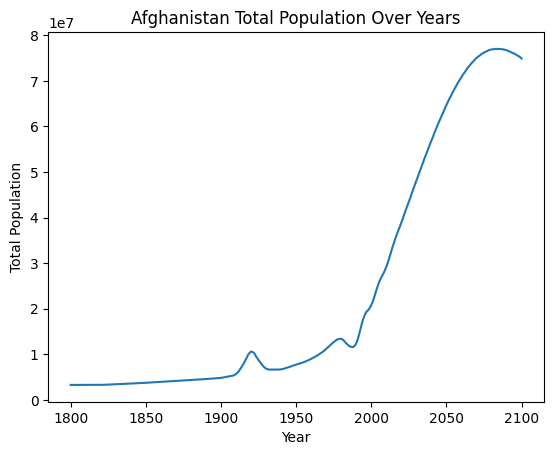

In [20]:
# 3. Plot each country to know the behavior of number of population in this country over years
# For Example: first country(Afghanistan)
plt.plot(df.loc['Afghanistan', 'Year'], df.loc['Afghanistan', 'Total Population'])
plt.title("Afghanistan Total Population Over Years")
plt.xlabel("Year")
plt.ylabel("Total Population")

In [ ]:
for country in df.index:
    plt.plot(df.loc[country,'Year'], df.loc[country,'Total Population'])
    plt.title(country)
    plt.show()

In [22]:
df.groupby(df.index)[['Total Population']].sum().sort_values('Total Population', ascending=False)

,Total Population
country,
China,240617000000
India,224562000000
United States,57423219998
Nigeria,47712799998
Indonesia,42533799996
...,...
San Marino,5560329
Palau,3130030
Tuvalu,2408400


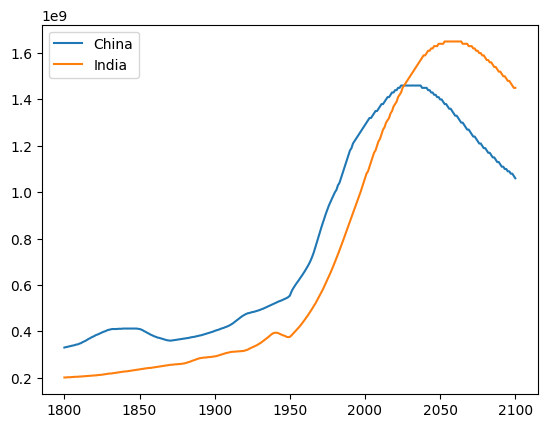

In [23]:
# Plotting two countries to compare between them (China with India(The largest 2 countries in number of population))
plt.plot(df.loc['China', 'Year'], df.loc['China','Total Population'], label='China')
plt.plot(df.loc['India', 'Year'], df.loc['India','Total Population'], label='India')
plt.legend()

In [24]:
china_df = df[df.Year.isin([1800, 1850, 1900, 2000, 2025, 2026, 2100])].loc['China']
india_df = df[df.Year.isin([1800, 1850, 1900, 2000, 2025, 2026, 2100])].loc['India']
print(china_df)
print(india_df)

         Year  Total Population
country                        
China    1800         330000000
China    1850         410000000
China    1900         402000000
China    2000        1290000000
China    2025        1460000000
China    2026        1460000000
China    2100        1060000000
         Year  Total Population
country                        
India    1800         201000000
India    1850         236000000
India    1900         292000000
India    2000        1060000000
India    2025        1450000000
India    2026        1460000000
India    2100        1450000000


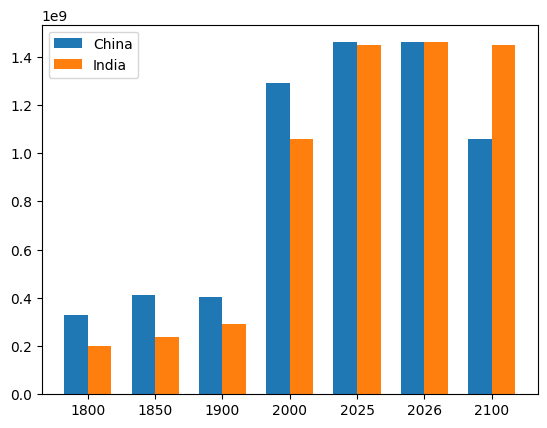

In [25]:
index = np.arange(len(india_df.Year))
plt.bar(index,  china_df['Total Population'] , width = 0.35, label = 'China')
plt.bar(index + 0.35, india_df['Total Population'], width = 0.35, label = 'India')
plt.xticks(index + 0.35 / 2, india_df.Year)
plt.legend()
plt.show()

From Visualization I noticed that China is larger than India in population for each year until 2025, In 2026 will be equivalent
After that (from 2027 to 2100) all expections say that India will be larger in population.

In [34]:
large_indexes = df.groupby(df.index)[['Total Population']].sum().sort_values('Total Population', ascending=False).iloc[:5, 0].index
low_indexes = df.groupby(df.index)[['Total Population']].sum().sort_values('Total Population', ascending=True).iloc[:5, 0].index
df_large = df.groupby(df.index)[['Total Population']].sum().sort_values('Total Population', ascending=False).iloc[:5, 0]
df_low = df.groupby(df.index)[['Total Population']].sum().sort_values('Total Population', ascending=True).iloc[:5, 0]

<BarContainer object of 5 artists>

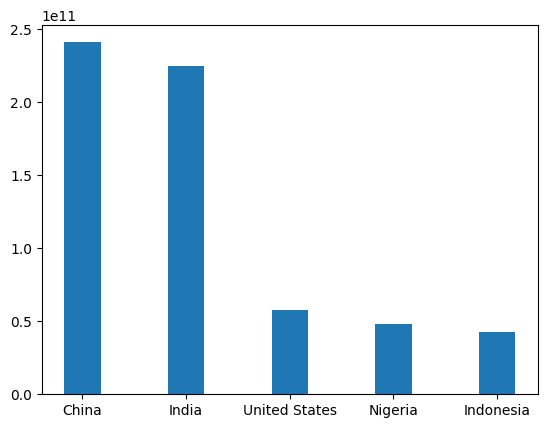

In [35]:
# 4. Top countries in the highest number of population
plt.bar(large_indexes, df_large, width=0.35)

<BarContainer object of 5 artists>

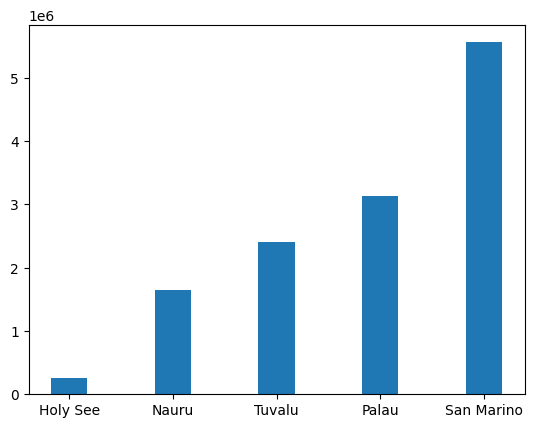

In [36]:
# 5. Top countries in the lowest number of population
plt.bar(low_indexes, df_low, width=0.35)

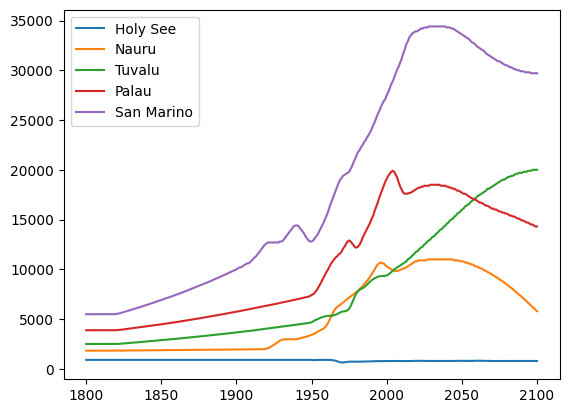

In [37]:
plt.plot(df.loc['Holy See', 'Year'], df.loc['Holy See','Total Population'], label='Holy See')
plt.plot(df.loc['Nauru', 'Year'], df.loc['Nauru','Total Population'], label='Nauru')
plt.plot(df.loc['Tuvalu', 'Year'], df.loc['Tuvalu','Total Population'], label='Tuvalu')
plt.plot(df.loc['Palau', 'Year'], df.loc['Palau','Total Population'], label='Palau')
plt.plot(df.loc['San Marino', 'Year'], df.loc['San Marino','Total Population'], label='San Marino')
plt.legend()

We can compare between countries for example: despite Palau is larger in the number of population than Nauru and Turvalu accourding histogram, but we see from following graph that Nauru and Tuvalu is larger in gross rate 